.   height verileri sağlıklı değil
.   vorticity verileri sağlık değil (rel, abs)
.   acc precip rainc mi rainc+rainnc mi
.   yer kartı
.   H, L  

In [20]:
from ituamt import AMTPlotter, colormaps
import os
from netCDF4 import Dataset
import pandas as pd
from wrf import getvar, extract_times, ALL_TIMES, latlon_coords, get_cartopy, vinterp, smooth2d, interplevel, to_np
from metpy.units import units
from metpy import calc
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [6]:
wrfout = Dataset(r"C:\Users\gkbrk\Desktop\modelleme\github\modelleme\hadise1\set_a1\set_a1_d01")

In [8]:
unit_list = {"temp": "K", "tempc": "°C", "height": "dam", "td": "°C", "rh": "%", "pressure": "hPa", "wind_kt": "knot", "wind_ms": "m/s", "eth": "°C", "omega": "hPa/saat", "avo": "1/saat$^2$", 
             "rvo": "10$^{-5}$/s", "slp": "hPa", "precip": "mm", "tempc_adv": "K/saat", "avo_adv": "1/saat**2"}

In [9]:
levels = {850: 0, 700: 1, 500: 2, 300: 3, 200: 4}
dx = wrfout.DX * units.m
dy = wrfout.DY * units.m
times = pd.to_datetime(extract_times(wrfout, ALL_TIMES))
temp = smooth2d(vinterp(wrfout, field=getvar(wrfout, 'tk', timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), extrapolate=True, field_type='tc', log_p=True, timeidx=ALL_TIMES), 15)
tempc = smooth2d(vinterp(wrfout, field=getvar(wrfout, 'tc', timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), extrapolate=True, field_type='tc', log_p=True, timeidx=ALL_TIMES), 15)
lats, lons = latlon_coords(temp)
cproj = get_cartopy(temp)
height = smooth2d(vinterp(wrfout, field=getvar(wrfout, 'z', units='dam', timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), extrapolate=True, field_type='z', log_p=True, timeidx=ALL_TIMES).metpy.convert_units("dam"), 355)
td = smooth2d(vinterp(wrfout, field=getvar(wrfout, 'td', timeidx=ALL_TIMES, units="degC"), vert_coord='pressure', interp_levels=list(levels.keys()), extrapolate=True, field_type='tc', log_p=True, timeidx=ALL_TIMES), 15)
rh = vinterp(wrfout, field=getvar(wrfout, "rh", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
pressure = vinterp(wrfout, field=getvar(wrfout, 'pressure', timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), extrapolate=True, field_type='pressure_hpa', log_p=True, timeidx=ALL_TIMES)
u_kt = vinterp(wrfout, field=getvar(wrfout, "ua", units="kt", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
u_ms = vinterp(wrfout, field=getvar(wrfout, "ua", units="m/s", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
v_kt = vinterp(wrfout, field=getvar(wrfout, "va", units="kt", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
v_ms = vinterp(wrfout, field=getvar(wrfout, "va", units="m/s", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
ws_ms = vinterp(wrfout, field=getvar(wrfout, "wspd_wdir", units="m/s", timeidx=ALL_TIMES)[0], vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES)
eth = smooth2d(vinterp(wrfout, field=getvar(wrfout, "eth", units="degC", timeidx=ALL_TIMES), vert_coord="pressure", interp_levels=list(levels.keys()), extrapolate=True, field_type='eth', log_p=True, timeidx=ALL_TIMES), 10)
omega = smooth2d(vinterp(wrfout, field=getvar(wrfout, "omega", timeidx=ALL_TIMES), vert_coord='pressure', interp_levels=list(levels.keys()), timeidx=ALL_TIMES).metpy.convert_units("hPa/h"), 15)

avo = ((vinterp(wrfout, getvar(wrfout, "avo", timeidx=ALL_TIMES), vert_coord="pressure", interp_levels=list(levels.keys()), timeidx=ALL_TIMES)) * 10**-5) * units("1/second")
f = (2 * 7 * 10**-5 * np.sin(np.deg2rad(lats))).values * units("1/second")
rvo = (avo - f)* 10**5

t2 = getvar(wrfout, "T2", timeidx=ALL_TIMES).metpy.convert_units("degC")
td2 = getvar(wrfout, "td2", units="degC", timeidx=ALL_TIMES)
slp = smooth2d(getvar(wrfout, "slp", units="hPa", timeidx=ALL_TIMES), 3)
pw = getvar(wrfout, "pw", timeidx=ALL_TIMES)
rainc = getvar(wrfout, "RAINC", timeidx=ALL_TIMES)
rainnc = getvar(wrfout, "RAINNC", timeidx=ALL_TIMES)
u10, v10 = getvar(wrfout, "uvmet10", units="kt", timeidx=ALL_TIMES)

tempc_adv = calc.advection(tempc, u_ms, v_ms, dx=dx, dy=dy, x_dim=-1, y_dim=-2, vertical_dim=-3).metpy.convert_units("K/h")
avo_adv = (calc.advection(avo, u_ms, v_ms, dx=dx, dy=dy, x_dim=-1, y_dim=-2, vertical_dim=-3)).metpy.convert_units("1/hour**2")

C:\Users\gkbrk\AppData\Local\Temp\ipykernel_11696\2552372106.py:33: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  tempc_adv = calc.advection(tempc, u_ms, v_ms, dx=dx, dy=dy, x_dim=-1, y_dim=-2, vertical_dim=-3).metpy.convert_units("K/h")
C:\Users\gkbrk\AppData\Local\Temp\ipykernel_11696\2552372106.py:33: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  tempc_adv = calc.advection(tempc, u_ms, v_ms, dx=dx, dy=dy, x_dim=-1, y_dim=-2, vertical_dim=-3).metpy.convert_units("K/h")
C:\Users\gkbrk\AppData\Local\Temp\ipykernel_11696\2552372106.py:34: UserWarning: Horizontal dimension numbers not found. Defaulting to (..., Y, X) order.
  avo_adv = (calc.advection(avo, u_ms, v_ms, dx=dx, dy=dy, x_dim=-1, y_dim=-2, vertical_dim=-3)).metpy.convert_units("1/hour**2")
C:\Users\gkbrk\AppData\Local\Temp\ipykernel_11696\2552372106.py:34: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  

In [37]:
ko_index = (tempc[:, 0] - tempc[:, 2]) - (tempc[:, 1] - td[:, 1]) + td[:, 0]

In [31]:
print(rainc.attrs["description"])
print(rainnc.attrs["description"])

ACCUMULATED TOTAL CUMULUS PRECIPITATION
ACCUMULATED TOTAL GRID SCALE PRECIPITATION


In [37]:
for time in times:
    print(time.strftime("%y%m%d%H"))

23042500
23042503
23042506
23042509
23042512
23042515
23042518
23042521
23042600
23042603
23042606
23042609
23042612
23042615
23042618
23042621
23042700
23042703
23042706
23042709
23042712
23042715
23042718
23042721
23042800


In [35]:
times[0].strftime("%y%m%d%H")

'_23042500'

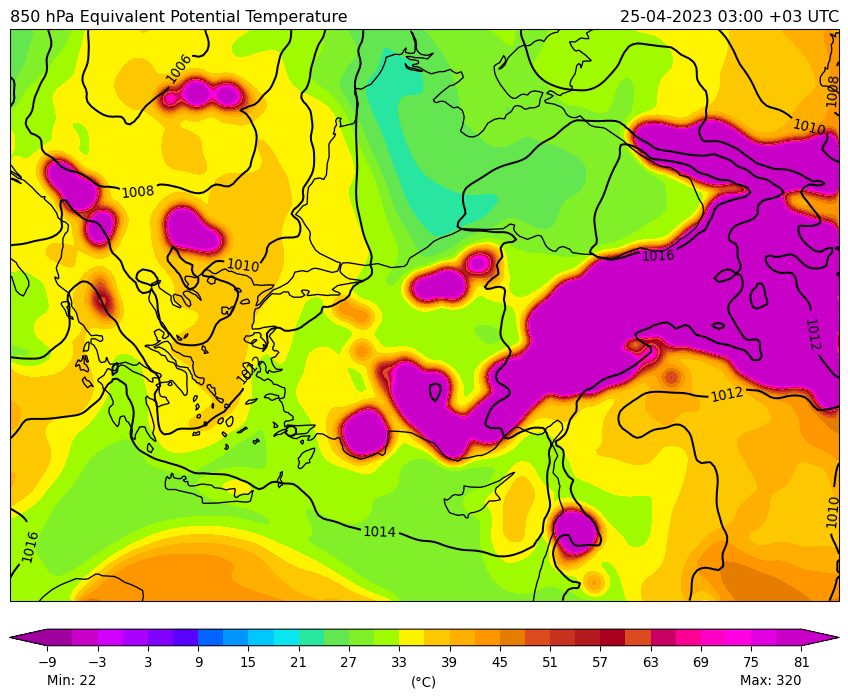

In [10]:
timestep=0
eth850 = AMTPlotter(lons=lons, lats=lats, contourf_data=eth[timestep, 0], cproj=cproj, contour_data=slp[timestep], title="850 hPa Equivalent Potential Temperature", time=times[timestep], 
                    cmap=colormaps["tigris"], cbar_label="(" + unit_list["eth"] + ")", contourf_levels=np.arange(-9, 84, 3), cbar_ticks=np.arange(-9, 84, 6))

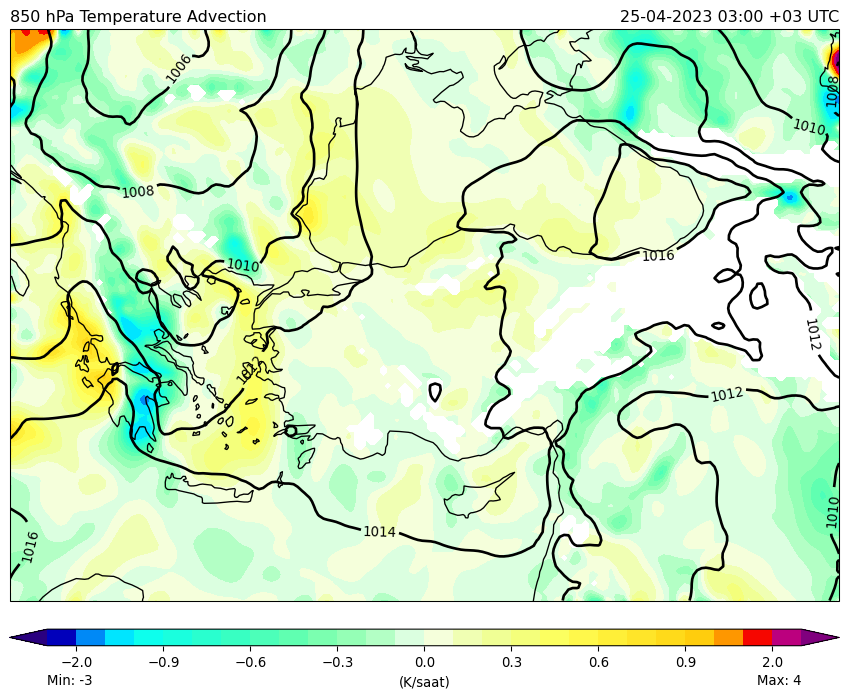

In [6]:
timestep=0
tempadv850 = AMTPlotter(lons=lons, lats=lats, contourf_data=tempc_adv[timestep, 0], cproj=cproj, contour_data=slp[timestep], title="850 hPa Temperature Advection", time=times[timestep],
                        cmap=colormaps["holton"], cbar_label="("+unit_list["tempc_adv"]+")", contourf_levels=np.concatenate((np.arange(-2.5, -0.5, 0.5), np.arange(-0.9, 1, 0.1), np.arange(1, 3, 0.5))), contour_linewidths=2)

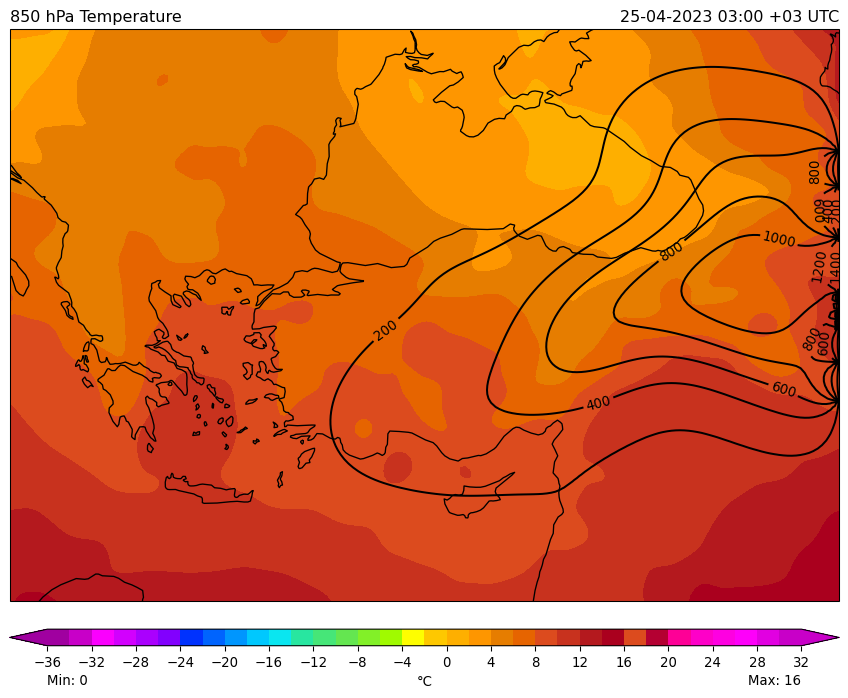

In [16]:
timestep=0
temphgt850 = AMTPlotter(lons=lons, lats=lats, contourf_data=tempc[timestep, 0], cproj=cproj, contour_data=height[timestep, 0], title="850 hPa Temperature", time=times[timestep],
                        cmap=colormaps["tigris"], cbar_label="("+unit_list["tempc"]+")", contourf_levels=np.arange(-36, 34, 2), cbar_ticks=np.arange(-36, 36, 4))


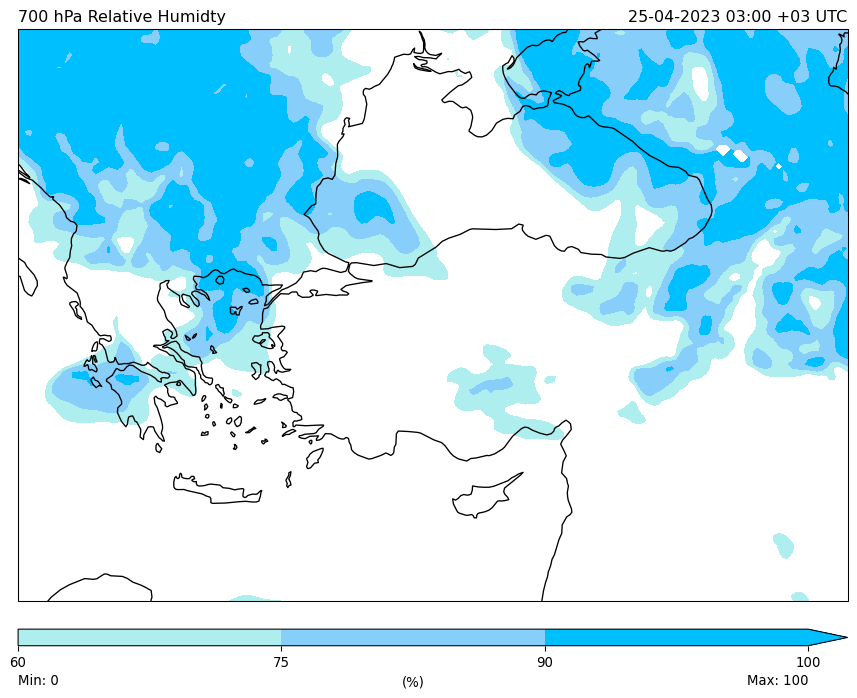

In [15]:
timestep=0
rh700 = AMTPlotter(lons=lons, lats=lats, contourf_data=rh[timestep, 1], cproj=cproj, title="700 hPa Relative Humidty", time=times[timestep], contourf_levels=[60, 75, 90, 100], cmap=colormaps["greens"], 
                   cbar_extend="max", cbar_label="("+unit_list["rh"]+")")


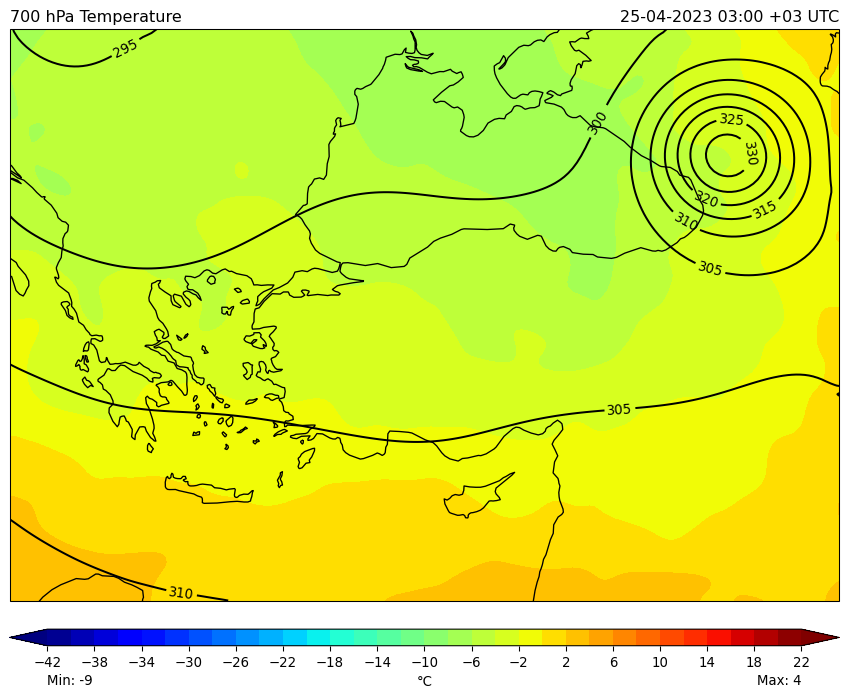

In [18]:
timestep=0
temphgt700 = AMTPlotter(lons=lons, lats=lats, contourf_data=tempc[timestep, 1], contour_data=height[timestep, 1], cproj=cproj, title="700 hPa Temperature", time=times[timestep],
                        cbar_label="("+unit_list["tempc"]+")", contourf_levels=np.arange(-42, 24, 2), cbar_ticks=np.arange(-42, 26, 4))


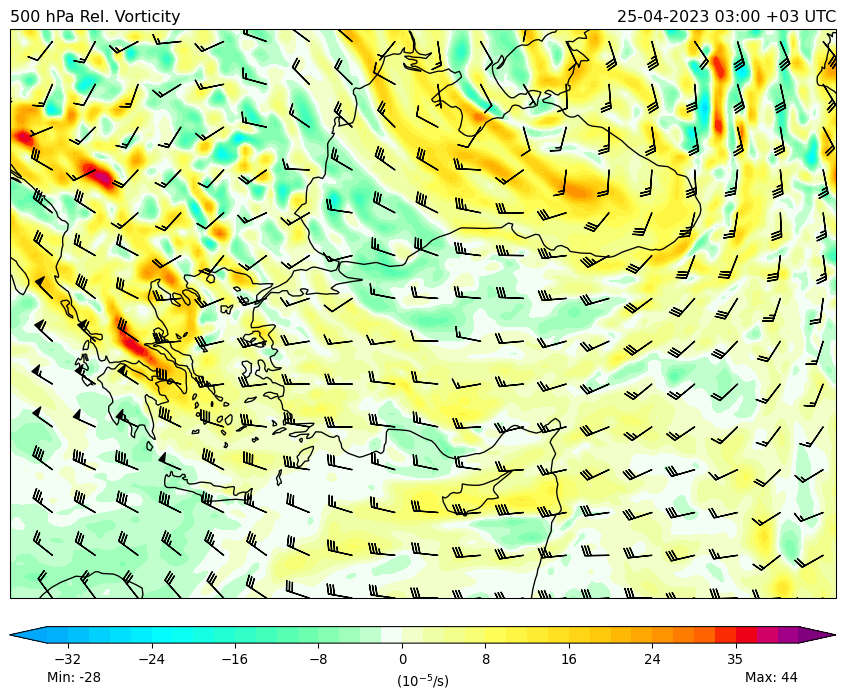

In [15]:
timestep=0
rvo500 = AMTPlotter(lons=lons, lats=lats, contourf_data=rvo[timestep, 2], cproj=cproj, title="500 hPa Rel. Vorticity", time=times[timestep], u=u_kt[timestep, 2], v=v_kt[timestep, 2], barb_gap=10,
                    cbar_label="("+unit_list["rvo"]+")", cmap=ListedColormap(colormaps["holton"].colors[45:]), contourf_levels=np.concatenate((np.arange(-34, 32, 2), np.arange(35, 55, 5))))


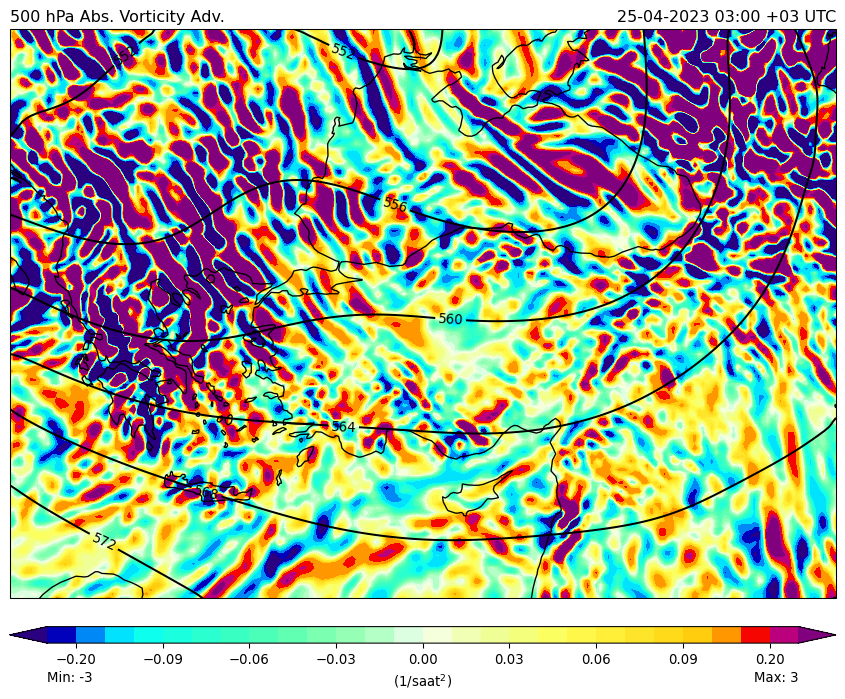

In [16]:
timestep=0
avo_adv500 = AMTPlotter(lons=lons, lats=lats, contourf_data=avo_adv[timestep, 2], contour_data=height[timestep, 2], cproj=cproj, title="500 hPa Abs. Vorticity Adv.", time=times[timestep],
                        cbar_label="("+unit_list["avo"]+")", cmap=colormaps["holton"], contourf_levels=np.concatenate((np.arange(-0.25, -0.05, 0.05), np.arange(-0.09, 0.1, 0.01), np.arange(0.1, 0.3, 0.05))))


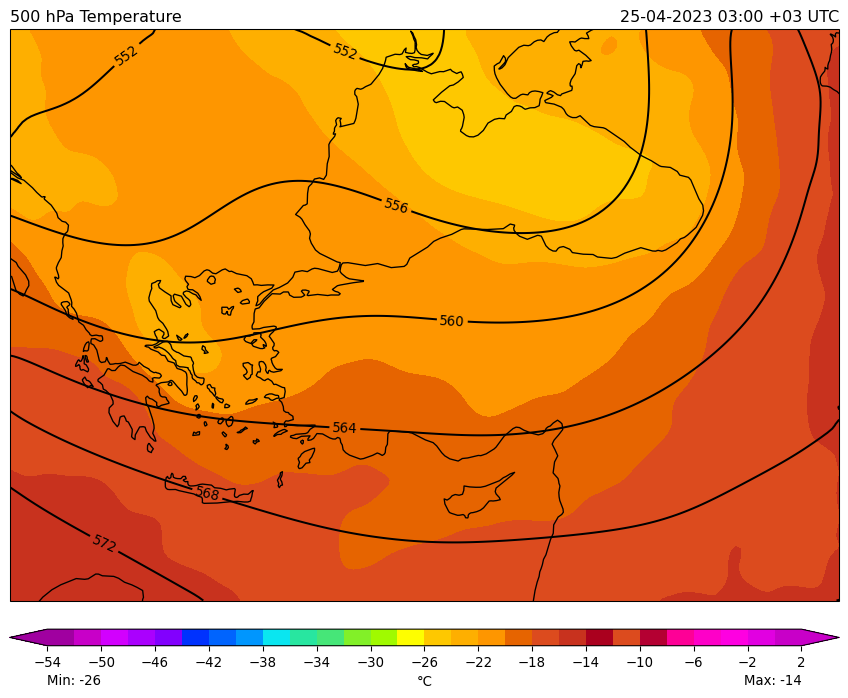

In [52]:
timestep=0
temphgt500 = AMTPlotter(lons=lons, lats=lats, contourf_data=tempc[timestep, 2], contour_data=height[timestep, 2], cproj=cproj, title="500 hPa Temperature", time=times[timestep],
                        cbar_label="("+unit_list["tempc"]+")", cmap=colormaps["tigris"], contourf_levels=np.arange(-54, 4, 2), cbar_ticks=np.arange(-54, 6, 4))


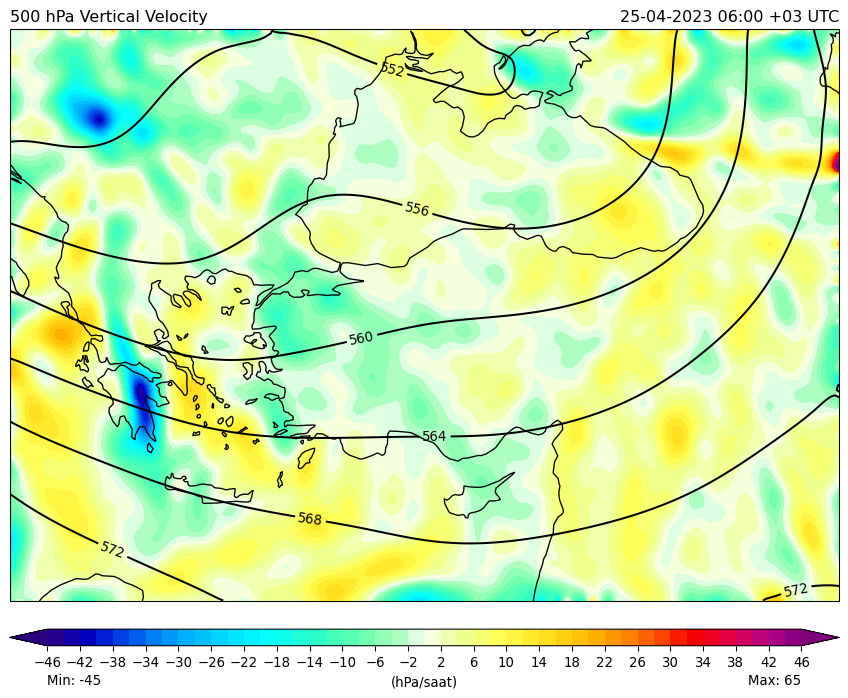

In [17]:
timestep=1
vertical_v500 = AMTPlotter(lons=lons, lats=lats, contourf_data=omega[timestep, 2], contour_data=height[timestep, 2], cproj=cproj, title="500 hPa Vertical Velocity", time=times[timestep], 
                           cbar_label="("+unit_list["omega"]+")", cmap=colormaps["holton"], contourf_levels=np.arange(-46, 48, 2), cbar_ticks=np.arange(-46, 50, 4))


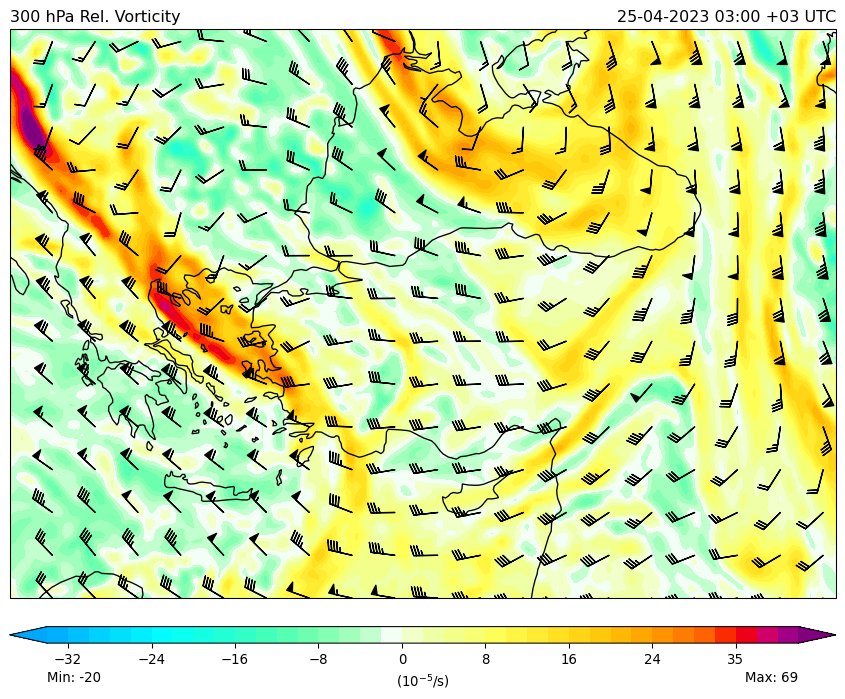

In [19]:
timestep=0
rvo300 = AMTPlotter(lons=lons, lats=lats, contourf_data=rvo[timestep, 3], cproj=cproj, title="300 hPa Rel. Vorticity", time=times[timestep], u=u_kt[timestep, 3], v=v_kt[timestep, 3], barb_gap=10,
                    cbar_label="("+unit_list["rvo"]+")", cmap=ListedColormap(colormaps["holton"].colors[45:]), contourf_levels=np.concatenate((np.arange(-34, 32, 2), np.arange(35, 55, 5))))


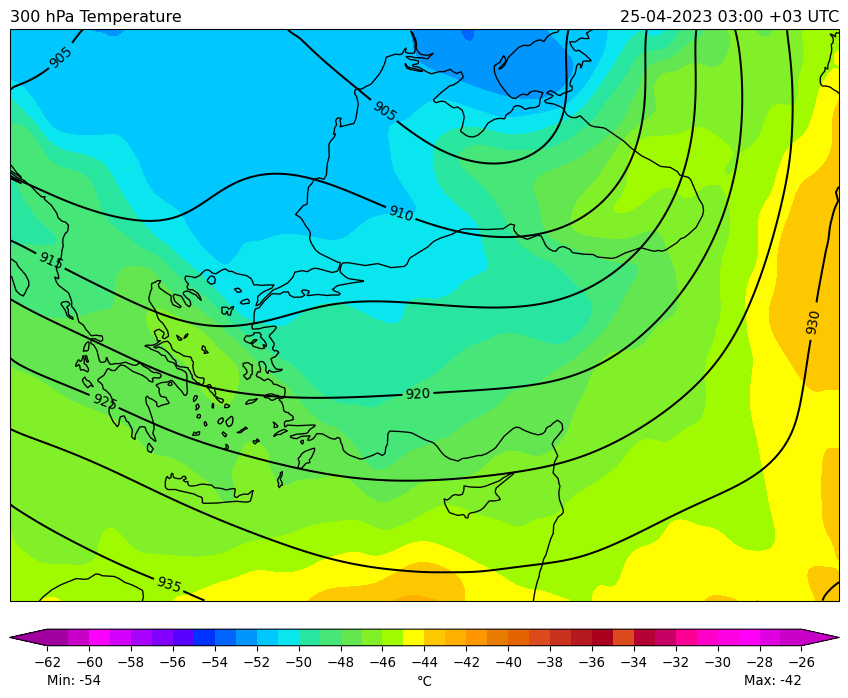

In [59]:
timestep=0
temphgt300 = AMTPlotter(lons=lons, lats=lats, contourf_data=tempc[timestep, 3], contour_data=height[timestep, 3], cproj=cproj, title="300 hPa Temperature", time=times[timestep], 
                        contourf_levels=np.arange(-62, -25), cmap=colormaps["tigris"], cbar_ticks=np.arange(-62, -25, 2), cbar_label="("+unit_list["tempc"]+")")


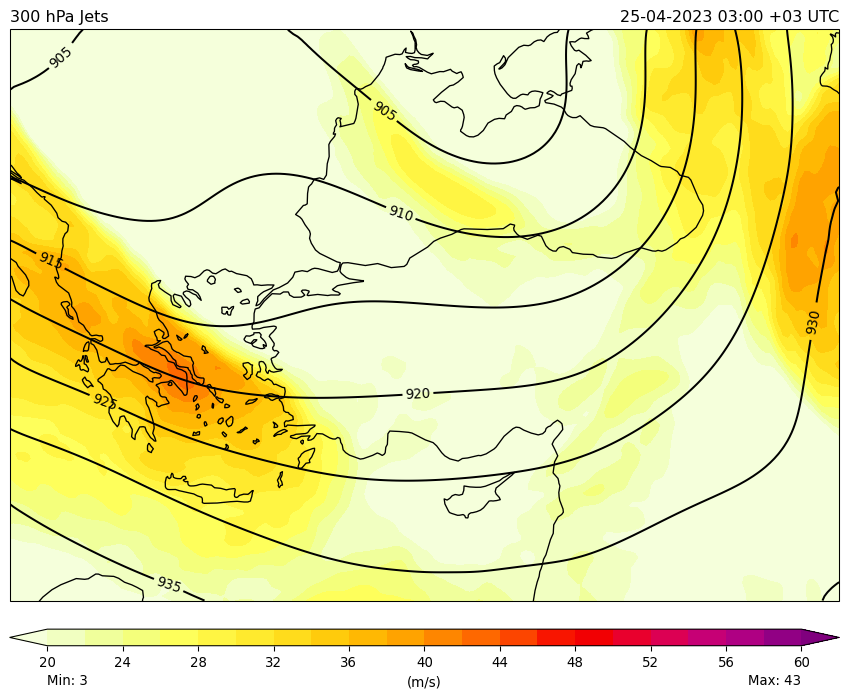

In [12]:
timestep=0
jet300 = AMTPlotter(lons=lons, lats=lats, contourf_data=ws_ms[timestep, 3], contour_data=height[timestep, 3], cproj=cproj, title="300 hPa Jets", time=times[timestep],
                    cbar_label="("+unit_list["wind_ms"]+")", cmap=ListedColormap(colormaps["holton"].colors[130:]), contourf_levels=np.arange(20, 62, 2), cbar_ticks=np.arange(20, 64, 4))


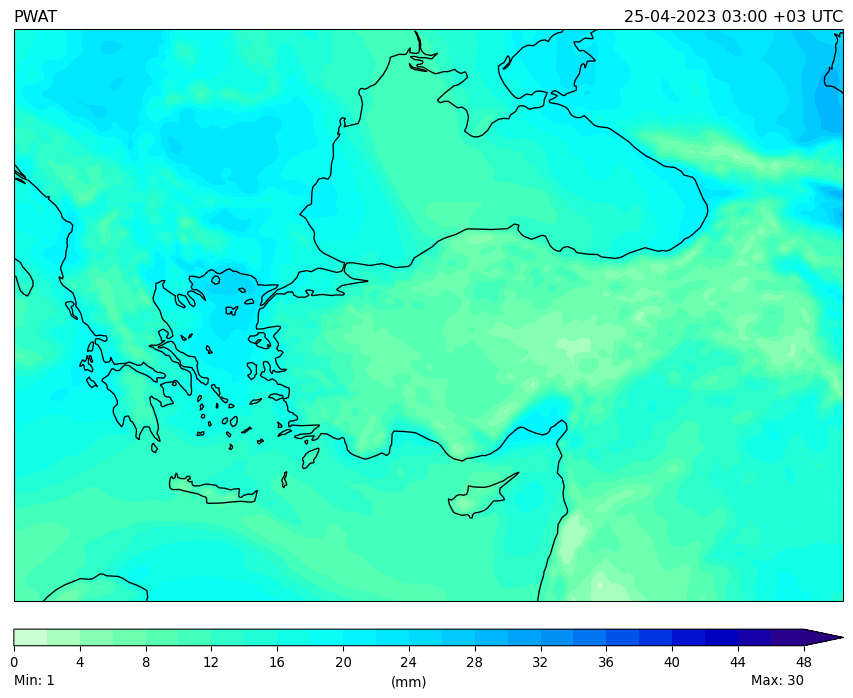

In [13]:
timestep=0
pwat = AMTPlotter(lons=lons, lats=lats, contourf_data=pw[timestep], cproj=cproj, title="PWAT", time=times[timestep],
                  cbar_label="("+unit_list["precip"]+")", cmap=ListedColormap(colormaps["holton_r"].colors[130:]), contourf_levels=np.arange(0, 50, 2), cbar_ticks=np.arange(0, 52, 4), cbar_extend="max")


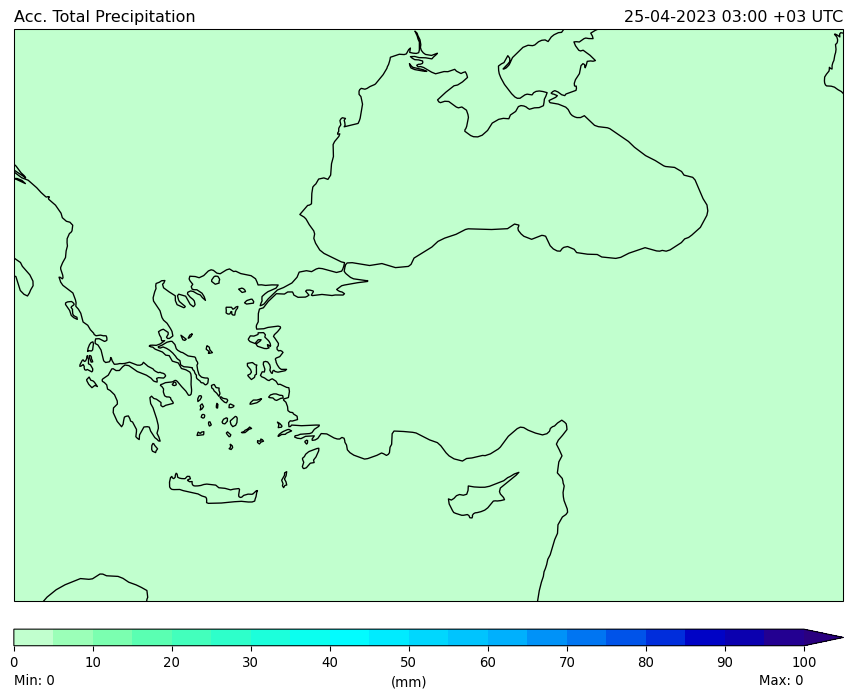

In [15]:
timestep=0
total_precip = AMTPlotter(lons=lons, lats=lats, contourf_data=rainnc[timestep], cproj=cproj, title="Acc. Total Precipitation", time=times[timestep], contourf_levels=np.arange(0, 105, 5),
                          cbar_label="("+unit_list["precip"]+")", cmap=ListedColormap(colormaps["holton_r"].colors[130:]), cbar_extend="max", cbar_ticks=np.arange(0, 110, 10))